# Handling Missing Data

1. Remove Missing Data
2. Impute them: Univariant/Multivariant
    - Univariant: Num and Cateogrical (SIMPLE IMPUTER CLASS)
        - In num = mean, random, end of distribution 
        - In cat = mode or missing
    - Multivariant: Knn imputer, Iterative imputer(MICE)
    

# 1. Remove Values 

(CCA complete case analysis)

CCA also called list wise deletion of cases, consists in discarding observations(rows) where values in any of the variables are missing.

CCA means literally analysing only those observations for which there is information in all of the variables(Columns) in the dataset.

#### Assumption to apply CCA:

```
1. MCAR
2. 5% se zyaada missing data hai toh do not apply CCA (We can think of removing column as well if a col have more missing values)
```

1. MCAR(Missing completely at random) : 

Missing data is completely on random basis
exmaple: 

(1000, 10) ages are rows but 50 values are missing randomly(distribution same rhe aisa ni ki start ya end yaa middle mai  hi 50 missing hai) then we will remove 50 rows and shape will became (950, 10)

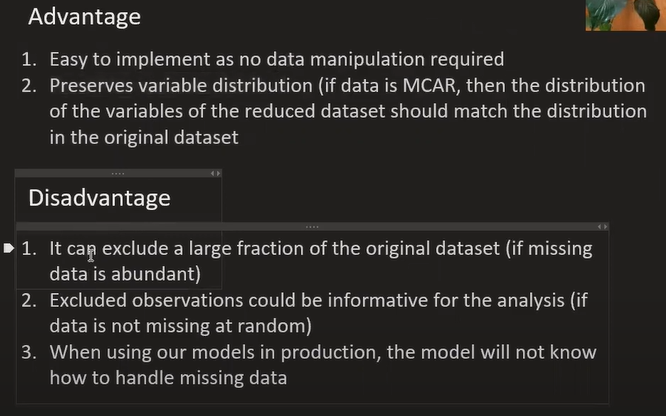

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Datasets/data_science_job.csv')

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

##### Gender, major_discipline, company_size, company_type ke upper nhi kar sakte CCA kyuki 23%, 14%, 30%, 32% rows hat zaayenge.
#### So we will do CCA on city_development_index, nrolled_university 2.014824, education_level 2.401086, training_hours 3.998330

In [7]:
df.shape

(19158, 13)

In [8]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
17651,0.836,Full time course,Masters,3.0,28.0
6967,0.624,no_enrollment,Graduate,1.0,157.0
1710,0.920,no_enrollment,Masters,16.0,50.0
5045,0.866,no_enrollment,Masters,7.0,NaN
1107,0.920,no_enrollment,Graduate,17.0,155.0


In [10]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

# Numerical

In [11]:
len(df[cols].dropna()) / len(df) ## this is the percentage of data that we will keep

0.8968577095730244

In [12]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

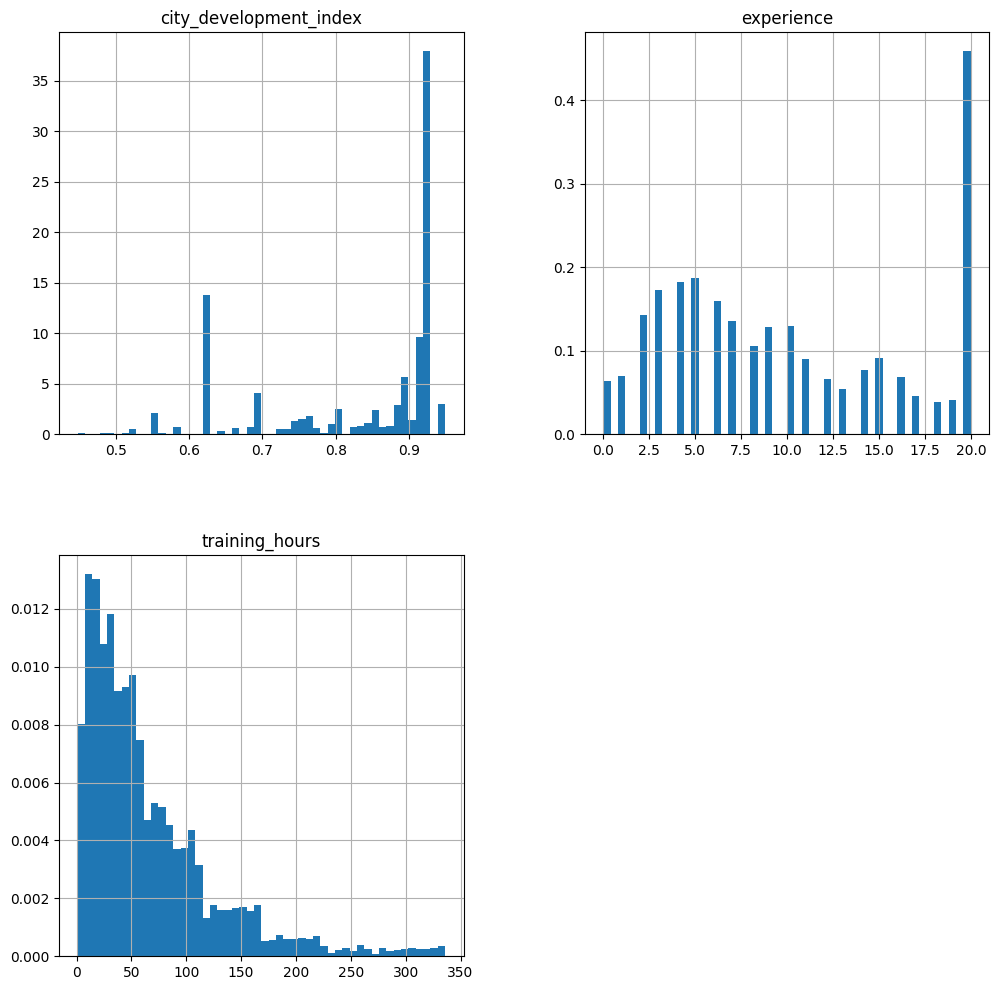

In [13]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<AxesSubplot: >

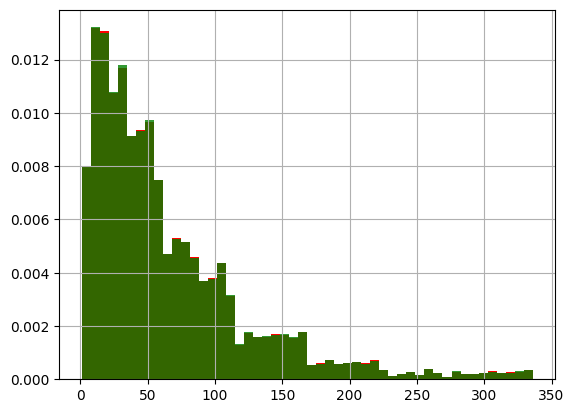

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot: ylabel='Density'>

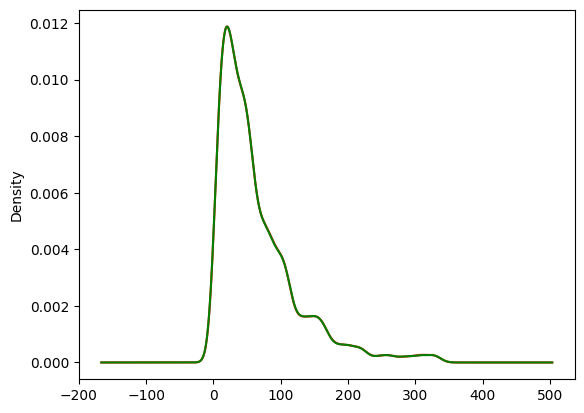

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

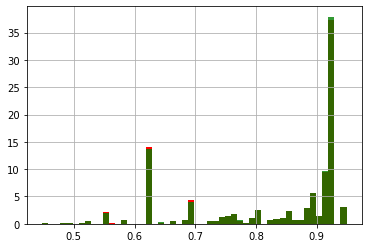

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot: ylabel='Density'>

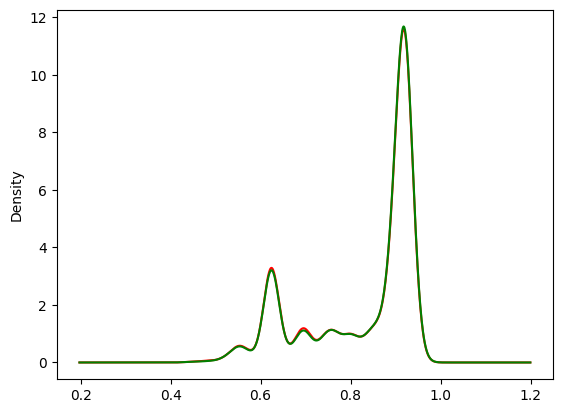

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<AxesSubplot: >

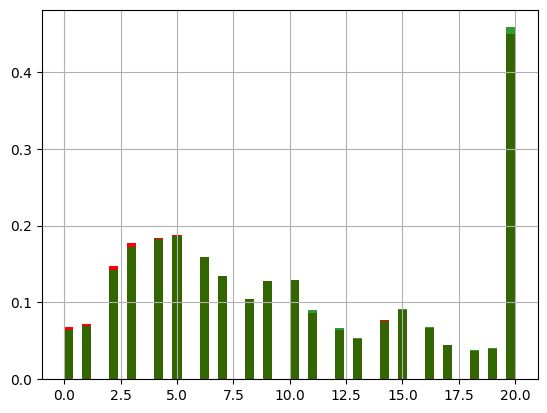

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot: ylabel='Density'>

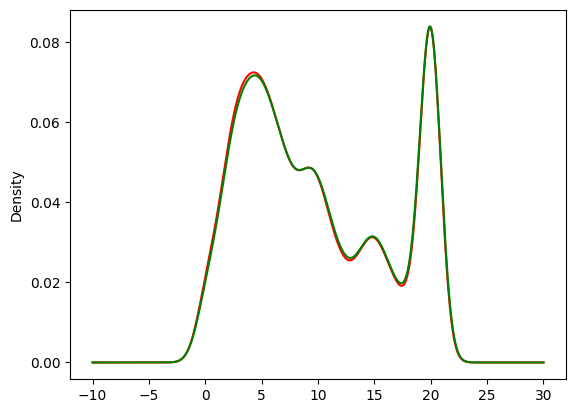

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

### categorical 

In [20]:
##  ratio of categories in the variable original data vs data after cca shows that the distribution of categories is similar means that the percentage of observations per category is similar in the original and the cca data
 ## it is similar to the plotting of the distributions of the variables for categorical variables
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [21]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [ ]:
## yet at the time of production, we will have new categories in the variables, so we need to add a category for missing data